In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import ast
from mpl_toolkits import mplot3d

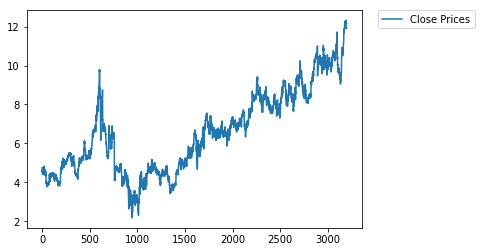

In [2]:
file = 'Data/Stocks/amswa.us.txt'
data = pd.read_csv(file)

#data = data[data.Date > '2015-01-01']
plt.plot(data.Close, label="Close Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [3]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [4]:
def kazanchesapla(data, miktar, bast, bitt):
    data = data[data.Date > bast]
    data = data[data.Date < bitt]
    durum = 'elde değil'
    islemkaydi = []
    ilkindex = data[:1].index[0]
    sonindex = data[-1:].index[0]
    for i in range(ilkindex + 1, sonindex):
        kazancorani = data.Close[i]/data.Close[i-1]
        if (data.emir[i] == 'al' or data.emir[i] == 'kuvvetli al') and durum == 'elde değil':
            islemkaydi.append(data.emir[i])
            durum = 'elde'
        elif (data.emir[i] == 'sat' or data.emir[i] == 'kuvvetli sat') and durum == 'elde':
            islemkaydi.append(data.emir[i])
            miktar = miktar * kazancorani
            durum = 'elde değil'
            
    return miktar, islemkaydi            

In [7]:
yp = 10000
bast = '2016-05-05'
bitt = '2017-05-05'

ypsd, islemkaydi = kazanchesapla(data, yp, bast, bitt)

print('Hisse senedinin ilk değeri: ', yp)
print('kazanç: ', ypsd/yp)
print('islem sayisi: ', len(islemkaydi))
print('Hisse senedinin son değeri: ', ypsd)
print('\n')
print( 'islemler: ', islemkaydi)

Hisse senedinin ilk değeri:  10000
kazanç:  1.0158196988423838
islem sayisi:  48
Hisse senedinin son değeri:  10158.196988423837


islemler:  ['al', 'sat', 'al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'sat', 'kuvvetli al', 'sat', 'al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'sat', 'kuvvetli al', 'sat', 'al', 'kuvvetli sat', 'al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'al', 'sat', 'al', 'kuvvetli sat', 'kuvvetli al', 'kuvvetli sat', 'kuvvetli al', 'sat', 'kuvvetli al', 'kuvvetli sat']
